In [1]:
import os

import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
import numpy as np
import softjax as sj
from matplotlib.colors import LinearSegmentedColormap
from functools import partial


os.environ["JAX_ENABLE_X64"] = "true"
os.environ["JAX_DEFAULT_MATMUL_PRECISION"] = "high"
os.environ["JAX_DEBUG_NANS"] = "false"
os.environ["JAX_COMPILATION_CACHE_DIR"] = os.environ["JAX_CACHE_DIR"]
os.environ["JAX_PERSISTENT_CACHE_ENABLE_XLA_CACHES"] = (
    "xla_gpu_per_fusion_autotune_cache_dir"
)
jax.config.update("jax_enable_x64", True)

In [13]:
softness = 0.1
x = jnp.array([-0.1, 0.0, 0.7, 1.8])
y = jnp.array([0.2, -0.5, 0.5, -1.0])

# Elementwise functions
print("Hard ReLU:", jax.nn.relu(x))
print("Soft ReLU:", sj.relu(x, softness=softness))
print("Hard Clip:", jnp.clip(x, -0.5, 0.5))
print("Soft Clip:", sj.clip(x, -0.5, 0.5, softness=softness))
print("Hard Absolute:", jnp.abs(x))
print("Soft Absolute:", sj.abs(x, softness=softness))
print("Hard Sign:", jnp.sign(x))
print("Soft Sign:", sj.sign(x, softness=softness))
print("Hard round:", jnp.round(x))
print("Soft round:", sj.round(x, softness=softness))

# Functions on arrays
print("Hard max:", jnp.max(x))
print("Soft max:", sj.max(x, softness=softness))
print("Hard min:", jnp.min(x))
print("Soft min:", sj.min(x, softness=softness))
print("Hard median:", jnp.median(x))
print("Soft median:", sj.median(x, softness=softness))
print("Hard top_k:", jax.lax.top_k(x, k=3)[0])
print("Soft top_k:", sj.top_k(x, k=3, softness=softness)[0])
print("Hard sort:", jnp.sort(x))
print("Soft sort:", sj.sort(x, softness=softness))
print("Hard ranking:", jnp.argsort(jnp.argsort(x)))
print("Soft ranking:", sj.ranking(x, softness=softness))

# Straight-through estimation: Use hard function on forward and soft on backward
print("Straight-through sort:", sj.sort_st(x, softness=softness))

# Functions returning indices
print("Hard argmax:", jnp.argmax(x))
print("Soft argmax:", sj.argmax(x, softness=softness))
print("Hard argmin:", jnp.argmin(x))
print("Soft argmin:", sj.argmin(x, softness=softness))
print("Hard argmedian:", "Not implemented in standard JAX")
print("Soft argmedian:", sj.argmedian(x, softness=softness))
print("Hard argtop_k:", jax.lax.top_k(x, k=3)[1])
print("Soft argtop_k:", sj.top_k(x, k=3, softness=softness)[1])
print("Hard argsort:", jnp.argsort(x))
print("Soft argsort:", sj.argsort(x, softness=softness))

## SoftBool generation
print("Hard heaviside:", jnp.heaviside(x, 0.5))
print("Soft heaviside:", sj.heaviside(x, softness=softness))
print("Hard greater:", x > y)
print("Soft greater:", sj.greater(x, y, softness=softness))
print("Hard greater equal:", x >= y)
print("Soft greater equal:", sj.greater_equal(x, y, softness=softness))
print("Hard less:", x < y)
print("Soft less:", sj.less(x, y, softness=softness))
print("Hard less equal:", x <= y)
print("Soft less equal:", sj.less_equal(x, y, softness=softness))
print("Hard equal:", x == y)
print("Soft equal:", sj.equal(x, y, softness=softness))
print("Hard not equal:", x != y)
print("Soft not equal:", sj.not_equal(x, y, softness=softness))
print("Hard isclose:", jnp.isclose(x, y))
print("Soft isclose:", sj.isclose(x, y, softness=softness))

## SoftBool manipulation
fuzzy_a = jnp.array([0.1, 0.2, 0.8, 1.0])
fuzzy_b = jnp.array([0.7, 0.3, 0.1, 0.9])
print("Soft AND:", sj.logical_and(fuzzy_a, fuzzy_b))
print("Soft OR:", sj.logical_or(fuzzy_a, fuzzy_b))
print("Soft NOT:", sj.logical_not(fuzzy_a))
print("Soft XOR:", sj.logical_xor(fuzzy_a, fuzzy_b))
print("Soft ALL:", sj.all(fuzzy_a))
print("Soft ANY:", sj.any(fuzzy_a))

## SoftBool selection
print("Where:", sj.where(fuzzy_a, x, y))

Hard ReLU: [0.  0.  0.7 1.8]
Soft ReLU: [0.03132617 0.06931472 0.70009115 1.8       ]
Hard Clip: [-0.1  0.   0.5  0.5]
Soft Clip: [-9.84325757e-02 -3.46944695e-18  4.87307813e-01  4.99999774e-01]
Hard Absolute: [0.1 0.  0.7 1.8]
Soft Absolute: [0.04621172 0.         0.69872453 1.79999995]
Hard Sign: [-1.  0.  1.  1.]
Soft Sign: [-0.46211716  0.          0.9981779   0.99999997]
Hard round: [-0.  0.  1.  2.]
Soft round: [-0.09064511  0.          0.71513653  1.81513653]
Hard max: 1.8
Soft max: 1.7999815903777097
Hard min: -0.1
Soft min: -0.07291629800981214
Hard median: 0.35
Soft median: 0.24772037254528773
Hard top_k: [1.8 0.7 0. ]
Soft top_k: [ 1.79998159  0.69911281 -0.02640987]
Hard sort: [-0.1  0.   0.7  1.8]
Soft sort: [-0.0729163  -0.02640987  0.69911281  1.79998159]
Hard ranking: [0 1 2 3]
Soft ranking: [2.73063414e+00 2.26809603e+00 1.00156413e+00 1.67486891e-05]
Straight-through sort: [-0.1  0.   0.7  1.8]
Hard argmax: 3
Soft argmax: [5.60270275e-09 1.52297251e-08 1.67014215e-05

In [3]:
# max_iter = 100
# fast = False

max_iter = 100
fast = True

In [4]:
# x = jnp.array([8, 2, 5, 9])
# k = 3
# softness_l = 0.1
# softness_h = 10.0
# axis = 0

# # # Median
# # median_fn = lambda x, mode, softness: sj.median(
# #     x,
# #     mode=mode,
# #     softness=softness,
# #     axis=axis,
# #     max_iter=max_iter,
# # )
# # median_hard = median_fn(x, mode="hard", softness=None)
# # median_logcosh_l = median_fn(x, mode="logcosh", softness=softness_l)
# # median_logcosh_h = median_fn(x, mode="logcosh", softness=softness_h)
# # median_pseudo_huber_l = median_fn(x, mode="pseudo_huber", softness=softness_l)
# # median_pseudo_huber_h = median_fn(x, mode="pseudo_huber", softness=softness_h)
# # print("Hard median:", median_hard)
# # print("Log-Cosh median (low temp):", median_logcosh_l)
# # print("Log-Cosh median (high temp):", median_logcosh_h)
# # print("Pseudo-Huber median (low temp):", median_pseudo_huber_l)
# # print("Pseudo-Huber median (high temp):", median_pseudo_huber_h)

# # Sort
# sort_fn = lambda x, mode, softness: sj.sort(
#     x,
#     mode=mode,
#     softness=softness,
#     axis=axis,
#     max_iter=max_iter,
#     fast=fast,
# )
# x_sorted_hard = sort_fn(x, mode="hard", softness=None)
# x_sorted_ent_l = sort_fn(x, mode="entropic", softness=softness_l)
# x_sorted_ent_h = sort_fn(x, mode="entropic", softness=softness_h)
# x_sorted_euc_l = sort_fn(x, mode="euclidean", softness=softness_l)
# x_sorted_euc_h = sort_fn(x, mode="euclidean", softness=softness_h)
# print("Hard sort:", x_sorted_hard)
# print("Entropic sort (low temp):", x_sorted_ent_l)
# print("Entropic sort (high temp):", x_sorted_ent_h)
# print("Euclidean sort (low temp):", x_sorted_euc_l)
# print("Euclidean sort (high temp):", x_sorted_euc_h)

# # Ranking
# ranking_fn = lambda x, mode, softness: sj.ranking(
#     x,
#     mode=mode,
#     softness=softness,
#     axis=axis,
#     max_iter=max_iter,
#     fast=fast,
# )
# x_ranking_hard = ranking_fn(x, mode="hard", softness=None)
# x_ranking_ent_l = ranking_fn(x, mode="entropic", softness=softness_l)
# x_ranking_ent_h = ranking_fn(x, mode="entropic", softness=softness_h)
# x_ranking_euc_l = ranking_fn(x, mode="euclidean", softness=softness_l)
# x_ranking_euc_h = ranking_fn(x, mode="euclidean", softness=softness_h)
# print("Hard ranking:", x_ranking_hard)
# print("Entropic ranking (low temp):", x_ranking_ent_l)
# print("Entropic ranking (high temp):", x_ranking_ent_h)
# print("Euclidean ranking (low temp):", x_ranking_euc_l)
# print("Euclidean ranking (high temp):", x_ranking_euc_h)

# # Top-k
# topk_fn = lambda x, mode, softness: sj.top_k(
#     x,
#     k=k,
#     mode=mode,
#     softness=softness,
#     axis=axis,
#     max_iter=max_iter,
#     fast=fast,
# )
# x_topk_hard, x_argtopk_hard = topk_fn(x, mode="hard", softness=None)
# x_topk_ent_l, x_argtopk_l = topk_fn(x, mode="entropic", softness=softness_l)
# x_topk_ent_h, x_argtopk_h = topk_fn(x, mode="entropic", softness=softness_h)
# x_topk_euc_l, x_argtopk_euc_l = topk_fn(x, mode="euclidean", softness=softness_l)
# x_topk_euc_h, x_argtopk_euc_h = topk_fn(x, mode="euclidean", softness=softness_h)

# print("Hard top-k:", x_topk_hard)
# print("Entropic top-k (low temp):", x_topk_ent_l)
# print("Entropic top-k (high temp):", x_topk_ent_h)
# print("Euclidean top-k (low temp):", x_topk_euc_l)
# print("Euclidean top-k (high temp):", x_topk_euc_h)

# print("Hard argtop-k:", x_argtopk_hard)
# print("Entropic argtop-k (low temp):", x_argtopk_l)
# print("Entropic argtop-k (high temp):", x_argtopk_h)
# print("Euclidean argtop-k (low temp):", x_argtopk_euc_l)
# print("Euclidean argtop-k (high temp):", x_argtopk_euc_h)


In [5]:
# # Examples of sj.argmax
# x = jnp.array([[5, 3, 4], [2, 7, 6]])

# print("jnp:", jnp.argmax(x, axis=1))
# print("sj_hard:", sj.argmax(x, mode="hard", axis=1))
# print("sj_entropic_low:", sj.argmax(x, mode="entropic", softness=0.01, axis=1))
# print("sj_entropic_high:", sj.argmax(x, mode="entropic", softness=1.0, axis=1))
# print("sj_euclidean_low:", sj.argmax(x, mode="euclidean", softness=0.01, axis=1))
# print("sj_euclidean_high:", sj.argmax(x, mode="euclidean", softness=4.0, axis=1))

In [6]:
# # Examples of sj.take_along_axis
# x = jnp.array([[1, 2, 3], [4, 5, 6]])

# indices = jnp.array([[0, 2], [1, 0]])
# indices_onehot = jax.nn.one_hot(indices, x.shape[1])

# print(jnp.take_along_axis(x, indices, axis=1))
# print(sj.take_along_axis(x, indices_onehot, axis=1))

# x = jnp.array([[5, 3, 4], [2, 7, 6]])

# indices = jnp.argsort(x, axis=1)
# indices_onehot = sj.argsort(x, axis=1, mode="hard")
# indices_soft = sj.argsort(x, axis=1, mode="entropic", softness=1.0)

# print("sorted_jnp:", jnp.take_along_axis(x, indices, axis=1))
# print("sorted_sj_hard:", sj.take_along_axis(x, indices_onehot, axis=1))
# print("sorted_sj_soft:", sj.take_along_axis(x, indices_soft, axis=1))

# indices = jnp.argmin(x, axis=1, keepdims=True)
# indices_onehot = sj.argmin(x, axis=1, mode="hard", keepdims=True)
# indices_soft = sj.argmin(x, axis=1, mode="entropic", softness=1.0, keepdims=True)

# print("argmin_jnp:", jnp.take_along_axis(x, indices, axis=1))
# print("argmin_val_onehot:", sj.take_along_axis(x, indices_onehot, axis=1))
# print("argmin_val_soft:", sj.take_along_axis(x, indices_soft, axis=1))

In [7]:
# # choose
# choices = jnp.array([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]])

# indices = jnp.array([2, 0, 1, 0])
# chosen = jnp.choose(indices, choices)
# print("chosen:", chosen)

# indices_onehot = jax.nn.one_hot(indices, len(choices))
# chosen_onehot = sj.choose(indices_onehot, choices)
# print("chosen_onehot:", chosen_onehot)

# indices_soft = jax.nn.softmax(indices_onehot * 5, axis=-1)
# chosen_soft = sj.choose(indices_soft, choices)
# print("chosen_soft:", chosen_soft)

In [8]:
def plot(
    fn,
    modes,
    title,
    softnesses=[0.1, 0.3, 1.0],
    xs=jnp.linspace(-2, 2, 1001),
    # fn, modes, title, softnesss=[5.0, 2.0, 1.0, 0.5, 0.2], xs=jnp.linspace(-2, 2, 1001)
):
    xs = jnp.array(xs)

    blue_red = LinearSegmentedColormap.from_list("blue_red", ["blue", "red"])
    colors = blue_red(jnp.array(softnesses) / max(softnesses))

    # Create plotting canvas
    fig, axes = plt.subplots(
        2,
        len(modes),
        figsize=(7 * len(modes), 8),
        sharex=True,
        sharey="row",
        squeeze=False,
    )

    for col_idx, mode in enumerate(modes):
        ax_f = axes[0][col_idx]
        ax_g = axes[1][col_idx]

        ys, grad_vals = jax.vmap(
            lambda x: jax.value_and_grad(fn)(x, mode="hard", softness=None)
        )(xs)
        ax_f.plot(xs, ys, label="hard", linewidth=2, linestyle="--", color="black")
        ax_g.plot(
            xs,
            grad_vals,
            label="hard",
            linewidth=2,
            linestyle="--",
            color="black",
        )

        for softness, color in zip(softnesses, colors):
            # if mode == "entropic":
            #     _softness = softness * 0.1  # Adjust softness for entropic mode
            # else:
            #     _softness = softness
            ys, grad_vals = jax.vmap(
                lambda x: jax.value_and_grad(fn)(x, mode=mode, softness=softness)
            )(xs)
            ax_f.plot(xs, ys, label=f"{softness}", linewidth=2, color=color)
            ax_g.plot(
                xs,
                np.array(grad_vals),
                label=f"{softness}",
                linewidth=2,
                color=color,
            )

        ax_f.set_title(f"vals [{mode}]", fontsize=14)
        ax_g.set_title(f"grads [{mode}]", fontsize=14)

        for ax in (ax_f, ax_g):
            ax.grid(True, linestyle="--", alpha=0.6)
            ax.axhline(0, color="black", linewidth=0.5, alpha=0.7)
            ax.axvline(0, color="black", linewidth=0.5, alpha=0.7)
            ax.legend()

    # Label axes
    for ax in axes[-1]:
        ax.set_xlabel("x", fontsize=12)

    fig.suptitle(title, fontsize=16)

    # fig.suptitle("Function Outputs", fontsize=16)
    fig.tight_layout(rect=(0, 0, 1, 0.96))
    plt.show()


In [9]:
y0 = 0.0
y1 = 0.5
y2 = 1.0
# zs = [-0.5, 0.5]
# zs = [-0.5, 0.0, 0.5]
# zs = [-1.5, -0.5, 0.5]
zs = [-2.5, -1.5, -0.5, 0.5]
# zs = [-3.0, -2.5, -1.5, -0.5, 0.5]
# zs = [-1.0, -0.5, 0.0, 0.5]

# y0 = 0.0
# y1 = 1.0
# y2 = 0.0
# zs = [-1.0, 0.5, 0.5]

# y0 = 0.0
# y1 = 0.0
# y2 = 0.0
# zs = [0.0, 0.0, 0.0]


@partial(jax.jit, static_argnames=("mode", "softness"))
def my_greater(x, mode, softness):
    return sj.greater(x, jnp.array(y0), mode=mode, softness=softness)


@partial(jax.jit, static_argnames=("mode", "softness"))
def my_greater_equal(x, mode, softness):
    return sj.greater_equal(x, jnp.array(y0), mode=mode, softness=softness)


@partial(jax.jit, static_argnames=("mode", "softness"))
def my_equal(x, mode, softness):
    return sj.equal(x, jnp.array(y0), mode=mode, softness=softness)


@partial(jax.jit, static_argnames=("mode", "softness"))
def my_not_equal(x, mode, softness):
    return sj.not_equal(x, jnp.array(y0), mode=mode, softness=softness)


@partial(jax.jit, static_argnames=("mode", "softness"))
def my_isclose(x, mode, softness):
    return sj.isclose(x, jnp.array(y0), mode=mode, softness=softness)


@partial(jax.jit, static_argnames=("mode", "softness"))
def my_where_greater(x, mode, softness):
    return sj.where(
        sj.greater(x, jnp.array(y0), mode=mode, softness=softness),
        jnp.array(y1),
        jnp.array(y2),
    )


@partial(jax.jit, static_argnames=("mode", "softness"))
def my_clip(x, mode, softness):
    return sj.clip(x, y1, y2, mode=mode, softness=softness)


@partial(jax.jit, static_argnames=("mode", "softness"))
def my_argmax(x, mode, softness):
    soft_indices = sj.argmax(
        x=jnp.stack([x, *zs], axis=-1),
        axis=-1,
        mode=mode,
        softness=softness,
    )
    return soft_indices[0]


@partial(jax.jit, static_argnames=("mode", "softness"))
def my_max(x, mode, softness):
    return sj.max(
        x=jnp.stack([x, *zs], axis=-1),
        axis=-1,
        mode=mode,
        softness=softness,
    )


@partial(jax.jit, static_argnames=("mode", "softness"))
def my_argtop_k(x, mode, softness):
    _, soft_indices = sj.top_k(
        x=jnp.stack([x, *zs], axis=-1),
        k=1,
        axis=-1,
        mode=mode,
        softness=softness,
        max_iter=max_iter,
        fast=fast,
    )  # shape: (1, 4)
    return soft_indices[0, 0]


@partial(jax.jit, static_argnames=("mode", "softness"))
def my_top_k(x, mode, softness):
    values, _ = sj.top_k(
        x=jnp.stack([x, *zs], axis=-1),
        k=1,
        axis=-1,
        mode=mode,
        softness=softness,
        max_iter=max_iter,
        fast=fast,
    )  # shape: (1,)
    return values[0]


@partial(jax.jit, static_argnames=("mode", "softness"))
def my_argsort(x, mode, softness):
    soft_indices = sj.argsort(
        x=jnp.stack([x, *zs], axis=-1),
        axis=-1,
        mode=mode,
        softness=softness,
        max_iter=max_iter,
        fast=fast,
    )  # shape: (1, 4)
    return soft_indices[1, 0]


@partial(jax.jit, static_argnames=("mode", "softness"))
def my_sort(x, mode, softness):
    values = sj.sort(
        x=jnp.stack([x, *zs], axis=-1),
        axis=-1,
        mode=mode,
        softness=softness,
        max_iter=max_iter,
        fast=fast,
    )  # shape: (4,)
    return values[1]


@partial(jax.jit, static_argnames=("mode", "softness"))
def my_median(x, mode, softness):
    return sj.median(
        x=jnp.stack([x, *zs], axis=-1),
        axis=-1,
        mode=mode,
        softness=softness,
        max_iter=max_iter,
    )


# @partial(jax.jit, static_argnames=("mode", "softness"))
# def my_median2(x, mode, softness):
#     return sj.median2(
#         x=jnp.stack([x, *zs], axis=-1),
#         axis=-1,
#         softness=softness,
#         iters=max_iter,
#     )


@partial(jax.jit, static_argnames=("mode", "softness"))
def my_ranking(x, mode, softness):
    values = sj.ranking(
        x=jnp.stack([x, *zs], axis=-1),
        axis=-1,
        mode=mode,
        softness=softness,
        max_iter=max_iter,
        fast=fast,
    )  # shape: (4,)
    return values[0]

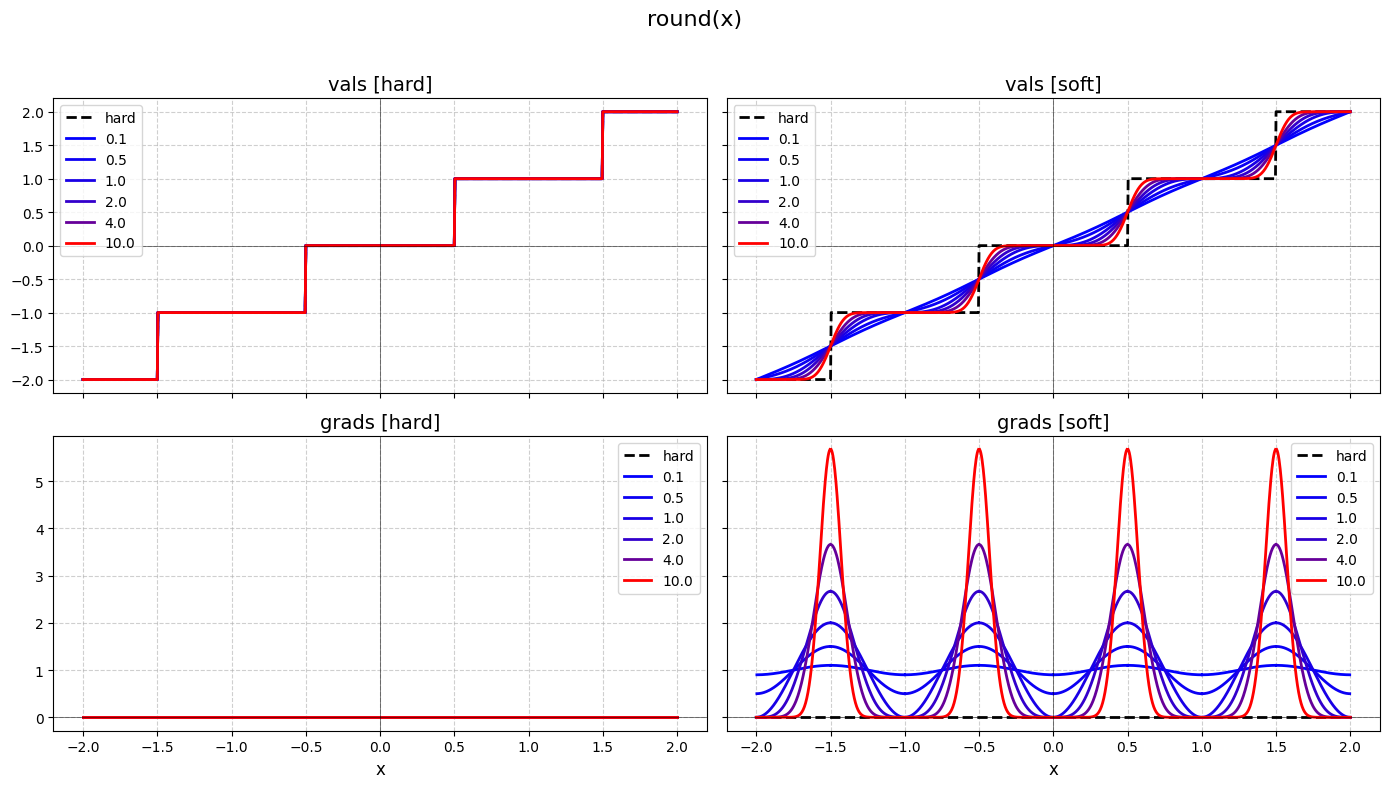

In [10]:
# heaviside_modes = ["sigmoid", "tanh", "pseudohuber", "linear", "cubic", "quintic"]
# heaviside_modes = ["sigmoid"]
relu_modes = [
    "softplus",
    "silu",
    "quadratic",
    "quartic",
    # "entropic",
    # "euclidean",
]
argmax_modes = ["entropic", "euclidean"]
topk_modes = ["entropic", "euclidean"]


# plot(sj.heaviside, title="heaviside(x)", modes=heaviside_modes)
# plot(sj.sign, title="sign(x)", modes=heaviside_modes)
# plot(my_greater, title=f"greater(x, {y0})", modes=heaviside_modes)
# plot(my_greater_equal, title=f"greater_equal(x, {y0})", modes=heaviside_modes)
# plot(my_equal, title=f"equal(x, {y0})", modes=heaviside_modes)
# plot(my_not_equal, title=f"not_equal(x, {y0})", modes=heaviside_modes)
# plot(my_isclose, title=f"isclose(x, {y0})", modes=heaviside_modes)
# plot(
#     my_where_greater,
#     title=f"where(greater(x, {y0}), {y1}, {y2})",
#     modes=heaviside_modes,
# )

# plot(sj.relu, title="relu(x)", modes=relu_modes)
# plot(my_clip, title=f"clip(x, {y1}, {y2})", modes=relu_modes)

# plot(sj.abs, title="abs(x)", modes=heaviside_modes)
# plot(my_argmax, title=f"argmax(x, {zs})[0]", modes=argmax_modes)
# plot(my_max, title=f"max(x, {zs})", modes=argmax_modes)

# plot(my_argtop_k, title=f"argtop_k(x, {zs}, k=1)[0,0]", modes=topk_modes)
# plot(my_top_k, title=f"top_k(x, {zs}, k=1)[0]", modes=topk_modes)
# plot(my_argsort, title=f"argsort(x, {zs})[1,0]", modes=topk_modes)
# plot(my_sort, title=f"sort(x, {zs})[1]", modes=topk_modes)
# plot(my_median, title=f"median(x, {zs})", modes=heaviside_modes)
# plot(my_median2, title=f"median2(x, {zs})", modes=topk_modes)
# plot(my_ranking, title=f"ranking(x, {zs})[0]", modes=topk_modes)

from jax.scipy.special import gammaln


def normalized_bump(x, n: int):
    # A_n = 2^n (n!)^2 / (2n)!
    logA = n * jnp.log(2.0) + 2.0 * gammaln(n + 1.0) - gammaln(2.0 * n + 1.0)
    A = jnp.exp(logA)
    return A * (1.0 - jnp.cos(2.0 * jnp.pi * x)) ** n


from jax.scipy.special import betainc


def bump_cdf(x, n: int):
    a = n + 0.5
    b = 0.5

    x = jnp.asarray(x)
    z1 = jnp.sin(jnp.pi * x) ** 2
    z2 = jnp.sin(jnp.pi * (1.0 - x)) ** 2

    F_left = 0.5 * betainc(a, b, z1)
    F_right = 1.0 - 0.5 * betainc(a, b, z2)

    return jnp.where(x <= 0.5, F_left, F_right)


def my_round(x, mode, softness):
    if mode == "hard":
        return jnp.round(x)
    elif mode == "soft":
        soft_round_1 = x - softness * jnp.sin(2.0 * jnp.pi * x) / (2.0 * jnp.pi)

        k = jnp.floor(x)
        u = x - k  # fractional part in [0, 1)
        a = softness + 0.5
        b = 0.5
        z = jnp.sin(jnp.pi * u) ** 2  # in [0, 1]

        half_cdf = 0.5 * betainc(a, b, z)
        F = jnp.where(u <= 0.5, half_cdf, 1.0 - half_cdf)
        soft_round_2 = k + F

        soft_round = jnp.where(softness < 1.0, soft_round_1, soft_round_2)
        return soft_round

        # return normalized_bump(x, n=2)
        # return jnp.floor(x) + bump_cdf(x - jnp.floor(x), n=1.0)

        # return x - jnp.sin(2.0 * jnp.pi * x) / (2.0 * jnp.pi)
        # return 1 - jnp.cos(x * 2.0 * jnp.pi)
        # return 1 + jnp.sin(x * 2.0 * jnp.pi - jnp.pi / 2)


plot(
    my_round,
    title="round(x)",
    modes=["hard", "soft"],
    softnesses=[0.1, 0.5, 1.0, 2.0, 4.0, 10.0],
)

In [11]:
# # Define x values
# # x_vals = np.linspace(-10, 10, 501)
# x_vals = np.linspace(-2, 2, 501)
# # x_vals = np.linspace(-0.1, 0.1, 501)
# x_jnp = jnp.array(x_vals)

# # Plot settings
# # modes = ["polynomial_0", "polynomial_1", "polynomial_2", "entropic"]
# modes = ["polynomial_0", "polynomial_1", "entropic"]
# # modes = ["entropic"]
# # softnesses = [10, 5.0, 2.0, 1.0, 0.5, 0.1]
# softnesses = [2.0, 1.0, 0.5, 0.1]
# # modes = ["entropic"]
# # softnesses = [100, 10, 1]
# blue_red = LinearSegmentedColormap.from_list("blue_red", ["blue", "red"])
# colors = blue_red(jnp.array(softnesses) / max(softnesses))


# # Functions to plot
# functions = {
#     # "argsort(-0.5, x, 0.5)[1, 1]": my_argsort,
#     # "sort(-0.5, x, 0.5)[0]": my_sort_0,
#     # "sort(-0.5, x, 0.5)[1]": my_sort_1,
#     # "sort(-0.5, x, 0.5)[2]": my_sort_2,
#     # "argtop_k(0, x, 0.5, k=1)[1]": my_argtop_k,
#     # "top_k(0, x, 0.5, k=1)": my_top_k,
#     # "argmax(0, x)[1]": my_argmax,
#     # "max(0, x)": my_max,
#     # "max(0, x, 0.5)": my_max_2,
#     # "argmin(0, x)[1]": my_argmin,
#     # "min(0, x)": my_min,
#     "relu(x)": sj.relu,
#     "clip(x, 0, 1)": my_clip,
#     "heaviside(x)": sj.heaviside,
#     "greater(x, 0)": my_greater,
#     "greater_equal(x, 0)": my_greater_equal,
#     "less(x, 0)": my_less,
#     "less_equal(x, 0)": my_less_equal,
#     "equal(x, 0)": my_equal,
#     "not_equal(x, 0)": my_not_equal,
#     "isclose(x, 0)": my_isclose,
#     "where(greater(x, 0), 2, -1)": my_where_greater,
# }


# # Create plotting canvas
# def make_figure(title_suffix):
#     return plt.subplots(
#         len(functions),
#         len(modes),
#         figsize=(7 * len(modes), 4 * len(functions)),
#         sharex=True,
#         sharey="row",
#         squeeze=False,
#     )


# # Plot function outputs
# fig_f, axes_f = make_figure("Function")

# # Plot gradients
# fig_g, axes_g = make_figure("Gradient")

# for row_idx, (func_name, func) in enumerate(functions.items()):
#     for col_idx, mode in enumerate(modes):
#         ax_f = axes_f[row_idx][col_idx]
#         ax_g = axes_g[row_idx][col_idx]

#         y_vals, grad_vals = jax.vmap(
#             lambda x: jax.value_and_grad(func)(x, mode="hard", softness=0.0)
#         )(x_jnp)
#         ax_f.plot(
#             x_vals, y_vals, label="hard", linewidth=2, linestyle="--", color="black"
#         )
#         ax_g.plot(
#             x_vals, grad_vals, label="hard", linewidth=2, linestyle="--", color="black"
#         )

#         for softness, color in zip(softnesses, colors):
#             if mode == "entropic":
#                    _softness = softness * 0.1  # Adjust softness for entropic mode
#             else:
#                 _softness = softness
#             y_vals, grad_vals = jax.vmap(
#                 lambda x: jax.value_and_grad(func)(x, mode=mode, softness=_softness)
#             )(x_jnp)
#             ax_f.plot(x_vals, y_vals, label=f"{softness}", linewidth=2, color=color)
#             ax_g.plot(
#                 x_vals,
#                 np.array(grad_vals),
#                 label=f"{softness}",
#                 linewidth=2,
#                 color=color,
#             )

#         ax_f.set_title(f"{func_name} [{mode}]", fontsize=14)
#         ax_g.set_title(f"∇{func_name} [{mode}]", fontsize=14)

#         for ax in (ax_f, ax_g):
#             ax.grid(True, linestyle="--", alpha=0.6)
#             ax.axhline(0, color="black", linewidth=0.5, alpha=0.7)
#             ax.axvline(0, color="black", linewidth=0.5, alpha=0.7)
#             ax.legend()

# # Label axes
# for ax in axes_f[-1]:
#     ax.set_xlabel("x", fontsize=12)
# for ax in axes_g[-1]:
#     ax.set_xlabel("x", fontsize=12)

# for ax, name in zip(axes_f[:, 0], functions.keys()):
#     ax.set_ylabel(f"{name}", fontsize=12)
# for ax, name in zip(axes_g[:, 0], functions.keys()):
#     ax.set_ylabel(f"d{name}/dx", fontsize=12)

# fig_f.suptitle("Function Outputs", fontsize=16)
# fig_g.suptitle("Function Gradients", fontsize=16)
# fig_f.tight_layout(rect=(0, 0, 1, 0.96))
# fig_g.tight_layout(rect=(0, 0, 1, 0.96))
# plt.show()